# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1.1

Gini is a good loss function, which calculates the difference between predicted and actual values, for categorical target variables because it measures the impurity or disorder of a dataset. It can measure the rate at which an element in a dataset can be incorrectly labeled.

1.2

Trees ovefit because it's easier for them to capture a lot of noise and unique patterns rather than general patterns in the dataset. This can lead to poor performance of the model. This tendency can be constrained by imposing a limit on the depth of the tree, a lower bound on the impurity that can appear at the terminal node, or a limit on how few cases can appear at the terminal node.

1.3

False. Trees can also perform well in situations with numeric or continuous data. Trees can measure non-linear relationships for numeric data, are less affected by outliers in numeric data, and can find optimal, data-driven splits. This shows all the situations where trees can perform well in other than categorical variables.

1.4

Most versions of classification/regression trees discourage more than two branches after a split because it increases the complexity of the model. This can lead to many errors, which can decrease the performance of the model in analyzing the data. Because it's harder to interpret, there are also diminishing returns for the model.

1.5

An overfit tree is very complex and has low bias and high variance. An underfit tree is very simple and has high bias and low variance. If the performance of the tree wasn't good on a test set and we've determined if the tree is overfit or underfit, we can do many things to solve the problem. If the tree is experiencing overfitting, we can truncate the tree and limit its depth. If the tree is experiencing underfitting, we can program it to avoid making splits that make the subsequent populations too pure.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

Chose not to do this one.

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

3.1

In [3]:
corporate_df = pd.read_csv("corporate_ratings.csv")

The number of observations is 2029. The number of variables is 31.

In [4]:
print(f"Number of observations: {corporate_df.shape[0]}") #Number of observations #2029
print(f"Number of variables: {corporate_df.shape[1]}") #Number of variables #31
display(corporate_df.head()) #Generate first few rows

Number of observations: 2029
Number of variables: 31


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


3.2

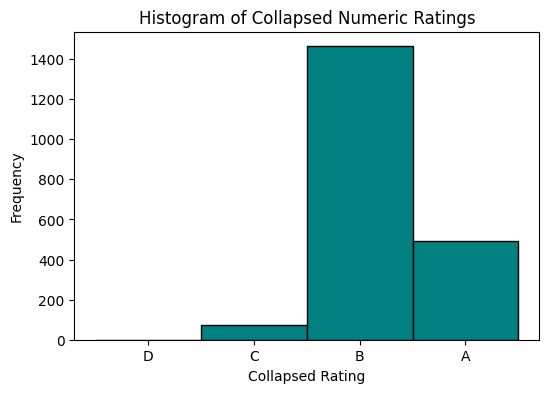

In [5]:
corporate_df["Rating_collapsed"] = corporate_df["Rating"].replace({ #Collapse all variations of A in A, B into B, C into C, and D into D
    "AAA": "A", "AA": "A", "A": "A",
    "BBB": "B", "BB": "B", "B": "B",
    "CCC": "C", "CC": "C", "C": "C",
    "D": "D"
})

Rating_num = {"A": 3, "B": 2, "C": 1, "D": 0} #Convert to numeric
corporate_df["Rating_num"] = corporate_df["Rating_collapsed"].map(Rating_num)

corporate_df["Rating_num"].plot( #Generate histogram
    kind = "hist",
    bins = [-0.5, 0.5, 1.5, 2.5, 3.5],
    color = "teal",
    edgecolor = "black",
    figsize = (6, 4)
)

plt.title("Histogram of Collapsed Numeric Ratings") #Title
plt.xlabel("Collapsed Rating")
plt.ylabel("Frequency")
plt.xticks([0, 1, 2, 3], ["D", "C", "B", "A"])
plt.show()



3.3

In [6]:
X = corporate_df.drop(columns = ["Rating", "Date", "Name", "Symbol", "Rating Agency Name"]) #Drop columns

X = pd.get_dummies(X, columns = ["Sector"], drop_first = True) #One-hot encode

print(X.shape) #Confirm the matrix
print(X.head())

(2029, 38)
   currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0      0.945894    0.426395   0.099690               44.203245   
1      1.033559    0.498234   0.203120               38.991156   
2      0.963703    0.451505   0.122099               50.841385   
3      1.019851    0.510402   0.176116               41.161738   
4      0.957844    0.495432   0.141608               47.761126   

   netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
0         0.037480            0.049351           0.176631   
1         0.044062            0.048857           0.175715   
2         0.032709            0.044334           0.170843   
3         0.020894           -0.012858           0.138059   
4         0.042861            0.053770           0.177720   

   operatingProfitMargin  returnOnAssets  returnOnCapitalEmployed  ...  \
0               0.061510        0.041189                 0.091514  ...   
1               0.066546        0.053204                 0.104800  ...   
2  

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

3.4

In [18]:
y = corporate_df["Rating_collapsed"]  #Define y

# Find classes with only one member
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts < 2].index

# Remove rows corresponding to classes with less than 2 members
corporate_df_cleaned = corporate_df[~corporate_df["Rating_collapsed"].isin(classes_to_remove)].copy()

# Re-define X and y from the cleaned dataframe
y = corporate_df_cleaned["Rating_collapsed"]
X = corporate_df_cleaned.drop(columns = ["Rating", "Date", "Name", "Symbol", "Rating Agency Name", "Rating_collapsed", "Rating_num"])
X = pd.get_dummies(X, columns = ["Sector"], drop_first = True) #One-hot encode


X_train, X_test, y_train, y_test = train_test_split( #Split into training vs testing set
    X, y, test_size = 0.3, random_state = 42, stratify = y
)

clf = DecisionTreeClassifier(min_samples_leaf = 10, random_state = 42) #Created Decision Tree
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test) #Make predictions on test set

acc = accuracy_score(y_test, y_pred) #Evaluate model performance
acc #0.742

0.7422003284072249

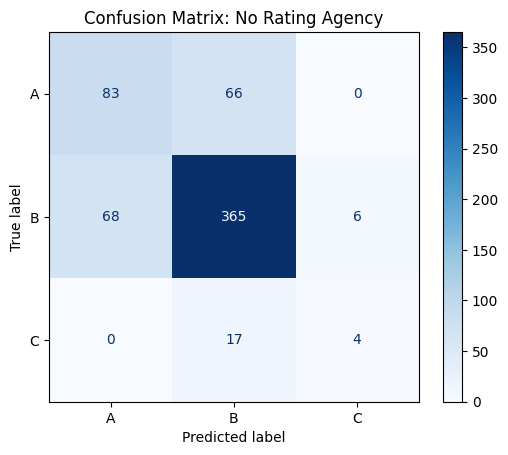

In [16]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot(cmap = plt.cm.Blues, values_format = "d")
plt.title("Confusion Matrix: No Rating Agency")
plt.show()

In [22]:
X_2 = corporate_df_cleaned.drop(columns = ["Rating", "Date", "Name", "Symbol", "Rating_collapsed", "Rating_num"]) #Drop columns for X_2

cat_cols = [col for col in ["Sector", "Rating Agency Name"] if col in X_2.columns] #One-hot encode Sector and Rating Agency Name
X_2 = pd.get_dummies(X_2, columns = cat_cols, drop_first = True)

X_2 = X_2.fillna(0) #Fill potential NaN values (though get_dummies shouldn't introduce them here)

y_2 = corporate_df_cleaned["Rating_collapsed"] #Define y_2

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split( #Split into training vs testing set
    X_2, y_2, test_size = 0.3, random_state = 42, stratify = y_2
)

clf2 = DecisionTreeClassifier(min_samples_leaf = 10, random_state = 42) #Created Decision Tree
clf2.fit(X_2_train, y_2_train) #Fit the model with training data and training labels

y2_pred = clf2.predict(X_2_test) #Make predictions on test set

acc2 = accuracy_score(y_2_test, y2_pred) #Evaluate model performance
print(f"\nAccuracy (with Rating Agency): {acc2:.3f}")

acc2 #0.749


Accuracy (with Rating Agency): 0.749


0.7487684729064039

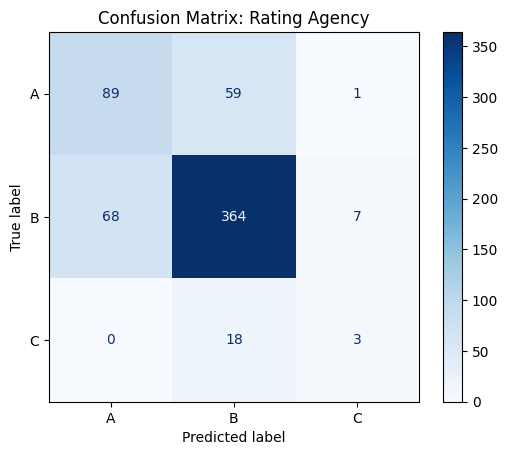

In [25]:
cm2 = confusion_matrix(y_2_test, y2_pred, labels = clf2.classes_) #Generate confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels = clf2.classes_)
disp2.plot(cmap = plt.cm.Blues, values_format = "d")
plt.title("Confusion Matrix: Rating Agency")
plt.show()

It predicts B ratings pretty well, but it still separates A and C, as some patterns can overlap. Overall, including Rating Agency helps but doesn't strongly separate the rating categories.


3.5

In [26]:
print("\n Interpretation")

if acc2 > acc:
  print("Including the rating agency slightly improved accuracy")
else:
  print("Including the rating agency did not improve accuracy")


 Interpretation
Including the rating agency slightly improved accuracy


When the rating agency was included, the accuracy increased slightly and the confusion matrix showed fewer misclassifications between A and B. This suggests that the rating agency provides some additional predictive information. However, the small improvement indicates that most rating variation is already captured by the other financial and sector features.